<a href="https://colab.research.google.com/github/peronvidal/tp-grupal-3-marias/blob/master/EDA_intervenciones_seguridad_vial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(15,5)})

In [100]:
!wget https://github.com/peronvidal/tp-grupal-3-marias/raw/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx

--2023-06-22 04:17:46--  https://github.com/peronvidal/tp-grupal-3-marias/raw/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/peronvidal/tp-grupal-3-marias/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx [following]
--2023-06-22 04:17:52--  https://raw.githubusercontent.com/peronvidal/tp-grupal-3-marias/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP reques

In [101]:
df = pd.read_excel('intervenciones-de-seguridad-clean.xlsx')
orig_df= pd.read_excel('intervenciones-de-seguridad-clean.xlsx')

In [102]:

## Aca se agregan columnas con datos relacionados a fechas
df['fecha'] = pd.to_datetime(df['fecha']) # todas las fechas a datetime de pandas
df['year'] = pd.DatetimeIndex(df['fecha']).year
df['month'] = pd.DatetimeIndex(df['fecha']).month
df['day'] = pd.DatetimeIndex(df['fecha']).month
# Define a function to apply the condition
def condition(row):
    if row['lesionados'] > 0 or row['fallecidos']>0:
        return 'SI'
    else:
        return 'NO'

# Apply the function to create a new column
# df['NewColumn'] = df.apply(lambda row: condition(row), axis=1)
def suma(row):
    return int(row['lesionados']) + int(row['fallecidos'])

df['heridos_o_fallecidos'] = df.apply(lambda row: condition(row), axis=1)
df['heridos_mas_fallecidos'] = df.apply(lambda row: suma(row), axis=1)



In [103]:
df_month_superficie = df.groupby(['month','superficie_de_la_via'])['lesionados'].sum().reset_index()
df_month_superficie = df.groupby(['month','condiciones_meteorologicas'])['lesionados'].sum().reset_index()
df_year = df.groupby(['year'])['lesionados'].sum().reset_index()
df_month = df.groupby(['month'])['lesionados'].sum().reset_index()
# df_month_superficie.head
df_year.head()

,year,lesionados
0,2014,683
1,2015,715
2,2016,679
3,2017,740
4,2018,576


In [104]:
df.columns

Index(['fecha', 'hora', 'autopista', 'banda_y_o_ramal', 'pk',
       'condiciones_meteorologicas', 'superficie_de_la_via', 'lesionados',
       'fallecidos', 'tipo_de_siniestro', 'moto', 'liviano', 'bus', 'camion',
       'year', 'month', 'day', 'heridos_o_fallecidos',
       'heridos_mas_fallecidos'],
      dtype='object')

In [105]:
# sns.violinplot(y=df["heridos_o_fallecidos"],x=df["condiciones_meteorologicas"])

<AxesSubplot:xlabel='heridos_o_fallecidos'>

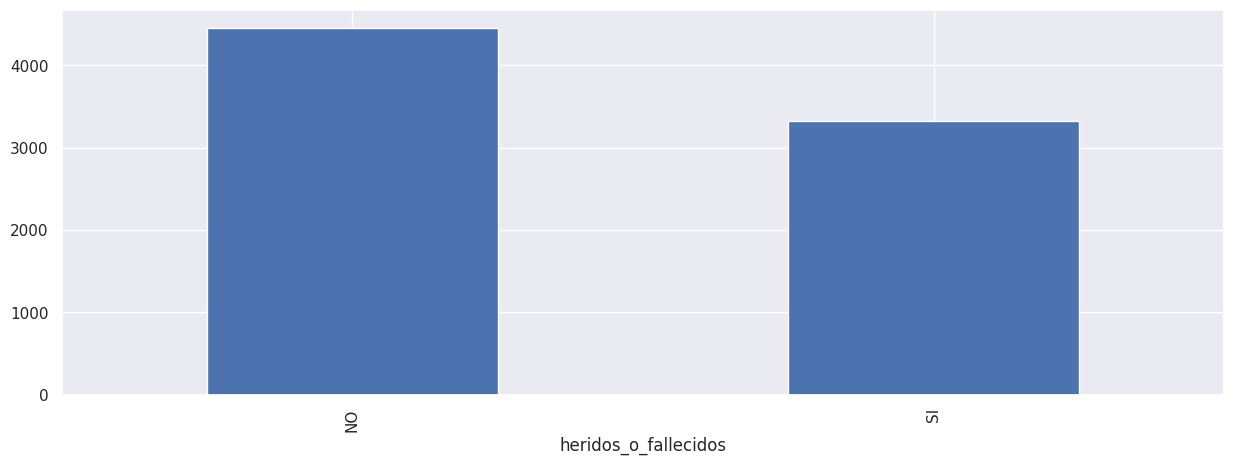

In [106]:
# porcentaje de intervenciones por estado de superficie
porcentajes_superficies = df['heridos_o_fallecidos'].value_counts()
porcentajes_superficies.plot(kind='bar')

<AxesSubplot:>

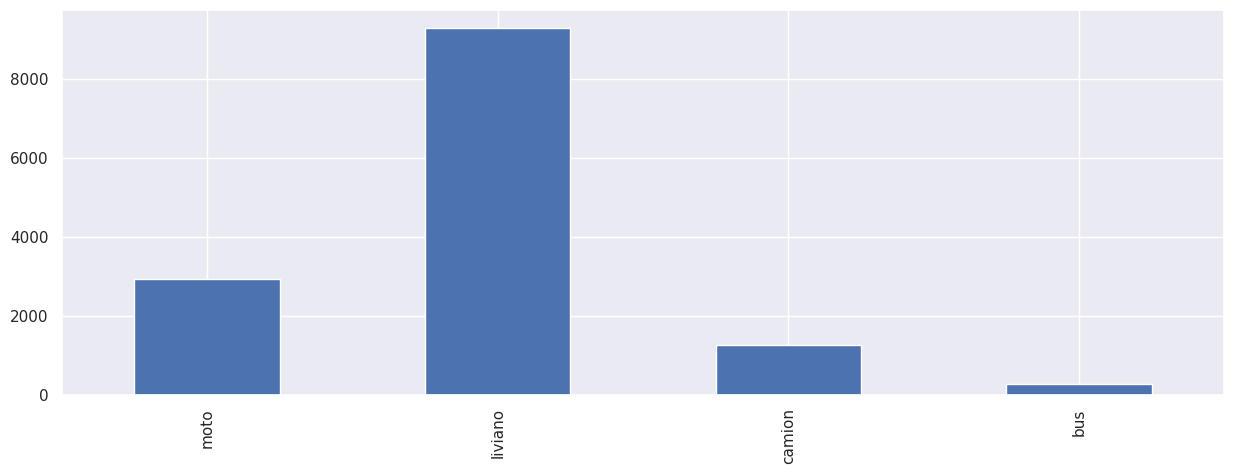

In [107]:
vehiculos = sums = df[['moto','liviano','camion','bus']].sum()

vehiculos.plot(kind='bar')


/tmp/ipykernel_4012/1938776432.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='heridos_mas_fallecidos', hue='superficie_de_la_via', shade=True)
/tmp/ipykernel_4012/1938776432.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='heridos_mas_fallecidos', hue='superficie_de_la_via', shade=True)


(0.0, 5.0)

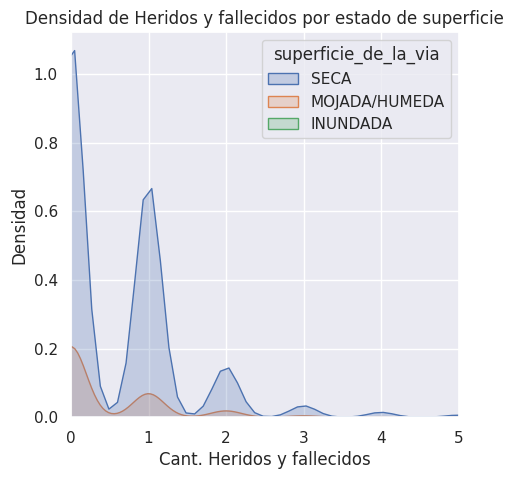

In [126]:
sns.kdeplot(data=df, x='heridos_mas_fallecidos', hue='superficie_de_la_via', shade=True)
plt.title('Densidad de Heridos y fallecidos por estado de superficie')
plt.ylabel('Densidad')
plt.xlabel('Cant. Heridos y fallecidos')
plt.xlim(0, 5)

/tmp/ipykernel_4012/1976603160.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['camion']<3], x='heridos_mas_fallecidos', hue='camion', shade=True, palette='Set2')


(0.0, 3.0)

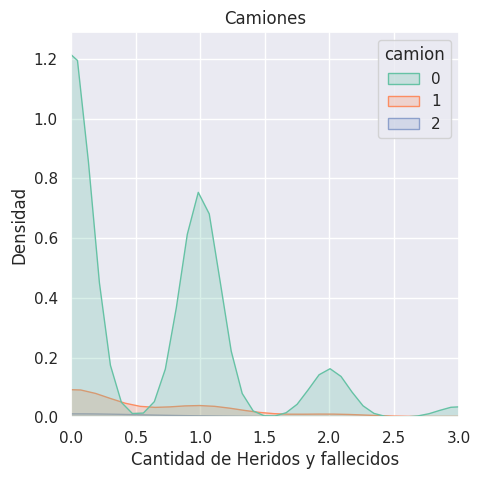

In [133]:
sns.kdeplot(data=df[df['camion']<3], x='heridos_mas_fallecidos', hue='camion', shade=True, palette='Set2')
plt.xlabel('Cantidad de Heridos y fallecidos')
plt.ylabel('Densidad')
plt.title('Camiones')
plt.xlim(0, 3)

/tmp/ipykernel_4012/4273220857.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='heridos_mas_fallecidos', hue='day', shade=True, palette='Set2')


(0.0, 5.0)

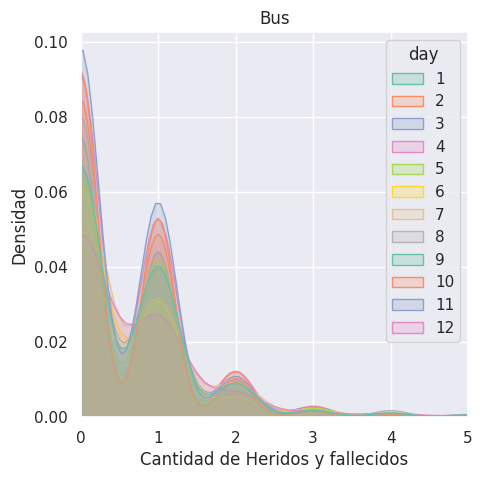

In [135]:
sns.kdeplot(data=df, x='heridos_mas_fallecidos', hue='day', shade=True, palette='Set2')
plt.xlabel('Cantidad de Heridos y fallecidos')
plt.ylabel('Densidad')
plt.title('Bus')
plt.xlim(0, 5)
#set y label
